<a href="https://colab.research.google.com/github/FarahYusri12/Warfarin-Dose-Prediction/blob/main/Warfarin_dosing(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Tetapkan tetapan yang anda mahu di sini
pd.set_option('display.max_columns', None) # kawal bilangan column untuk dipaparkan oleh pandas pada satu2 masa.
pd.set_option('display.max_rows', None) # kawal bilangan rows untuk dipaparkan oleh pandas pada satu2 masa
pd.set_option('display.width', 1000) # memberitahu pandas berapa banyk ruang yang perlu dipaparkan




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df= pd.read_csv('Warfarin_gen_clinic.csv')
print(df.head())
print("\n" + "=" *50 + "\n")
df.info()


            ID Age (years)  Gender  Weight (kg)  Height (cm)  Dose (mg) CYP2C9 VKORC1 (rs9923231; C/T)
0  PA135312261     60 - 69    Male        115.7       193.04       49.0  *1/*1                     A/G
1  PA135312262     50 - 59  Female        144.2       176.53       42.0  *1/*1                     A/A
2  PA135312263     40 - 49  Female         77.1       162.56       53.0  *1/*1                     G/G
3  PA135312264     60 - 69    Male         90.7       182.24       28.0  *1/*1                     A/G
4  PA135312265     50 - 59    Male         72.6       167.64       42.0  *1/*3                     A/G


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5700 non-null   object 
 1   Age (years)              5658 non-null   object 
 2   Gender                   5696 non-null   object 
 3  

In [ ]:
print(df['CYP2C9']. unique())
print("\n" + "="*50 + "\n")
print(df['VKORC1 (rs9923231; C/T)']. unique())
print("\n" + "="*50 + "\n")
print(df['Age (years)']. unique())
print("\n" + "="*50 + "\n")
print(df['Dose (mg)']. unique())
print("\n" + "="*50 + "\n")
print(df['Gender']. unique())
print("\n" + "="*50 + "\n")
print(df['Weight (kg)']. unique())
print("\n" + "="*50 + "\n")
print(df['Height (cm)']. unique())

['*1/*1' '*1/*3' '*1/*2' '*2/*2' '*2/*3' '*3/*3' nan '*1/*5' '*1/*13'
 '*1/*14' '*1/*11' '*1/*6']


['A/G' 'A/A' 'G/G' nan]


['60 - 69' '50 - 59' '40 - 49' '70 - 79' '30 - 39' '80 - 89' '90+'
 '20 - 29' '10 - 19' nan]


[ 49.    42.    53.    28.    71.    18.    17.    97.    14.    70.
  10.    91.    30.    35.    63.    21.    77.    56.    88.    12.
  44.    23.    45.    25.    38.    32.    34.    26.    37.    16.
  33.    19.    24.    40.    39.    31.    29.    46.    20.    22.
  36.    62.     9.    67.    15.    48.    84.    52.    51.    47.
  58.    11.    64.    41.    90.    54.    75.    55.    61.    80.
  60.    43.   115.   126.    98.    50.    27.    13.    14.7   42.7
  47.95   9.1   50.82  32.69  46.69   7.14  12.53  52.5   50.75  32.76
  15.47  43.82  46.13  29.54  42.28  67.41  26.46  26.6   17.5   92.4
  28.42  46.55   6.3   87.5   44.1   71.47  36.33  42.77  38.01  31.71
  13.93  21.77  11.34  10.57  20.23  30.87  21.84  37.1   21.63  25.83
  30.38  28.

In [ ]:
# Remove duplicates and missing value
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.info()
print("\n" + "="*50 + "\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3429 entries, 0 to 5410
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3429 non-null   object 
 1   Age (years)              3429 non-null   object 
 2   Gender                   3429 non-null   object 
 3   Weight (kg)              3429 non-null   float64
 4   Height (cm)              3429 non-null   float64
 5   Dose (mg)                3429 non-null   float64
 6   CYP2C9                   3429 non-null   object 
 7   VKORC1 (rs9923231; C/T)  3429 non-null   object 
dtypes: float64(3), object(5)
memory usage: 241.1+ KB




,ID,Age (years),Gender,Weight (kg),Height (cm),Dose (mg),CYP2C9,VKORC1 (rs9923231; C/T)
0,PA135312261,60 - 69,Male,115.7,193.04,49.0,*1/*1,A/G
1,PA135312262,50 - 59,Female,144.2,176.53,42.0,*1/*1,A/A
2,PA135312263,40 - 49,Female,77.1,162.56,53.0,*1/*1,G/G
3,PA135312264,60 - 69,Male,90.7,182.24,28.0,*1/*1,A/G
4,PA135312265,50 - 59,Male,72.6,167.64,42.0,*1/*3,A/G


In [ ]:
# Encode for gender
df["Gender_code"]= df["Gender"]. map({"Male":1, "Female":0})

# Encode for CYP2C9
CYP_map= {"*1/*1":0, "*1/*2":1, "*1/*3":1, "*2/*3":2, "*3/*3":2}
df["CYP2C9_code"]= df["CYP2C9"]. map(CYP_map)

# Encode for VKORC1
VKOR_map = {"G/G":0, "A/G":1, "A/A":2}
df["VKORC1_code"]= df["VKORC1 (rs9923231; C/T)"]. map(VKOR_map)

df.head()

# map()= menukar nilai dalam sesuatu series
# series = struktur data seperti integer, float

,ID,Age (years),Gender,Weight (kg),Height (cm),Dose (mg),CYP2C9,VKORC1 (rs9923231; C/T),Gender_code,CYP2C9_code,VKORC1_code
0,PA135312261,60 - 69,Male,115.7,193.04,49.0,*1/*1,A/G,1,0.0,1
1,PA135312262,50 - 59,Female,144.2,176.53,42.0,*1/*1,A/A,0,0.0,2
2,PA135312263,40 - 49,Female,77.1,162.56,53.0,*1/*1,G/G,0,0.0,0
3,PA135312264,60 - 69,Male,90.7,182.24,28.0,*1/*1,A/G,1,0.0,1
4,PA135312265,50 - 59,Male,72.6,167.64,42.0,*1/*3,A/G,1,1.0,1


In [ ]:
# change age from x-x format to this X

def change_mid_age(str_age):
  str_age= str(str_age). strip() # strip=remove space, str=change from any format to text(string)

  if "-" in str_age: # age exp(60-69)
    low, high= str_age.split("-")
    return(int(low) + int(high))/2 # exp((60+69)/2)

  elif "+" in str_age: # age exp 90+
    base= int(str_age.replace("+",""))
    return base


df["Age"]= df["Age (years)"]. apply(change_mid_age)
df.head()

,ID,Age (years),Gender,Weight (kg),Height (cm),Dose (mg),CYP2C9,VKORC1 (rs9923231; C/T),Gender_code,CYP2C9_code,VKORC1_code,Age
0,PA135312261,60 - 69,Male,115.7,193.04,49.0,*1/*1,A/G,1,0.0,1,64.5
1,PA135312262,50 - 59,Female,144.2,176.53,42.0,*1/*1,A/A,0,0.0,2,54.5
2,PA135312263,40 - 49,Female,77.1,162.56,53.0,*1/*1,G/G,0,0.0,0,44.5
3,PA135312264,60 - 69,Male,90.7,182.24,28.0,*1/*1,A/G,1,0.0,1,64.5
4,PA135312265,50 - 59,Male,72.6,167.64,42.0,*1/*3,A/G,1,1.0,1,54.5


In [ ]:
df.info()
# Missing value found in column CYP2C9_code

<class 'pandas.core.frame.DataFrame'>
Index: 3429 entries, 0 to 5410
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3429 non-null   object 
 1   Age (years)              3429 non-null   object 
 2   Gender                   3429 non-null   object 
 3   Weight (kg)              3429 non-null   float64
 4   Height (cm)              3429 non-null   float64
 5   Dose (mg)                3429 non-null   float64
 6   CYP2C9                   3429 non-null   object 
 7   VKORC1 (rs9923231; C/T)  3429 non-null   object 
 8   Gender_code              3429 non-null   int64  
 9   CYP2C9_code              3382 non-null   float64
 10  VKORC1_code              3429 non-null   int64  
 11  Age                      3429 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 348.3+ KB


In [ ]:
# remove missing value
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 5410
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3382 non-null   object 
 1   Age (years)              3382 non-null   object 
 2   Gender                   3382 non-null   object 
 3   Weight (kg)              3382 non-null   float64
 4   Height (cm)              3382 non-null   float64
 5   Dose (mg)                3382 non-null   float64
 6   CYP2C9                   3382 non-null   object 
 7   VKORC1 (rs9923231; C/T)  3382 non-null   object 
 8   Gender_code              3382 non-null   int64  
 9   CYP2C9_code              3382 non-null   float64
 10  VKORC1_code              3382 non-null   int64  
 11  Age                      3382 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 343.5+ KB


In [ ]:
# Step 1: Data Preparation
# Seperate data into 2 parts, Features (X) and Target (Y).
X=df[["Age","Gender_code", "Weight (kg)", "Height (cm)", "CYP2C9_code", "VKORC1_code"]]
# X= data that will be use to make prediction

Y=df["Dose (mg)"]
# Y= The target variable to be predicted by the variable

In [ ]:
# Step 2: Data Splitting (Train-Test Split)
# Training Set: Model will learn from the X_train and Y_train to identify patterns and relationship between features and dosage
# Testing set: Model will make the prediction on X_test data, compare to the actual values in Y_test to see how accurate it is.

# test_size=0.2 : Specifies the percentage of data that will be used for test set. 20% data will be used for testing, 80% used for trainning.
# random_state=42 : to ensure data split exactly the same everytime the code is run.

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# standardScaler= To make sure all the features are on the same scale to prevent biased model.

In [ ]:
# Step 3: Model Training

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Step 4: Model Evaluation

Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print("\nModel Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")


Model Performance:
MAE  : 8.70
RMSE : 14.46
R²   : 0.40


In [ ]:
# Feature important

importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\nFeature Importance (Linear Coefficients):")
print(importance)


Feature Importance (Linear Coefficients):
       Feature  Coefficient
5  VKORC1_code    -7.523023
0          Age    -3.890316
2  Weight (kg)     3.737672
4  CYP2C9_code    -3.443425
3  Height (cm)     1.823953
1  Gender_code    -1.427699


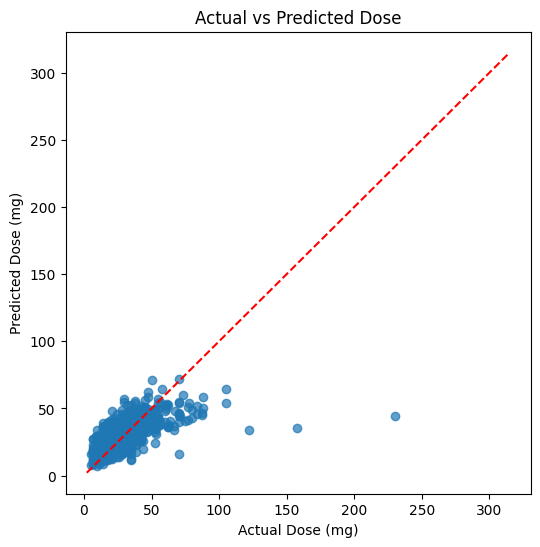

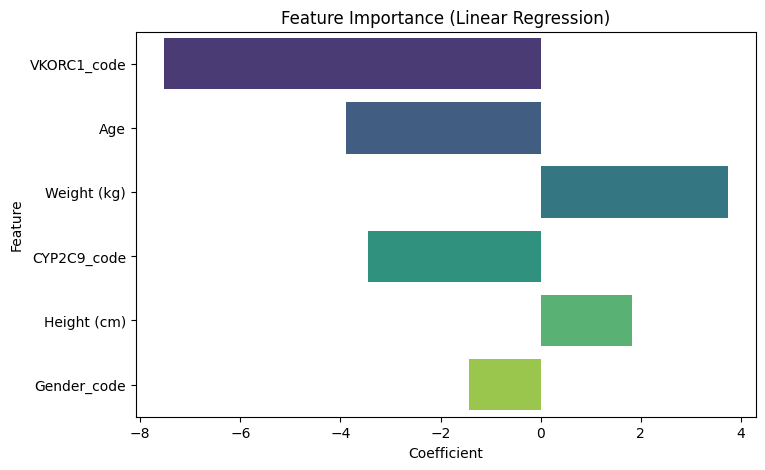

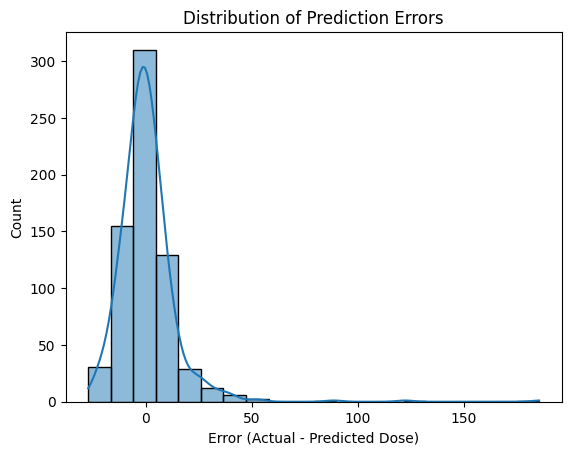

In [34]:
# Visualization

# Scatter plot: actual vs predicted dose
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred, alpha=0.7)
plt.xlabel("Actual Dose (mg)")
plt.ylabel("Predicted Dose (mg)")
plt.title("Actual vs Predicted Dose")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color="red", linestyle="--")
plt.show()

print("\n" + "="*100 + "\n")

# Feature important bar plot
plt.figure(figsize=(8,5))
sns.barplot(x="Coefficient", y="Feature", data=importance, hue="Feature", palette="viridis", legend=False)
plt.title("Feature Importance (Linear Regression)")
plt.show()

print("\n" + "="*100 + "\n")

# Distribution plot error(sejauh mana prediction lari)
errors = Y_test - Y_pred

sns.histplot(errors, bins=20, kde=True)
plt.xlabel("Error (Actual - Predicted Dose)")
plt.title("Distribution of Prediction Errors")
plt.show()